In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import os
from funcoes import *
from skimage.color import rgb2gray

os.chdir('C:\\Users\\rthiago\\OneDrive\\IA Expert\\Segmentação\\Imagens') # para o notebook

# os.chdir('C:\\Users\\thi-m\\OneDrive\\Documentos\\Thiago\\IA_Expert\\Segmentação\\Imagens') # para o desktop

Segmentação baseada em clusters

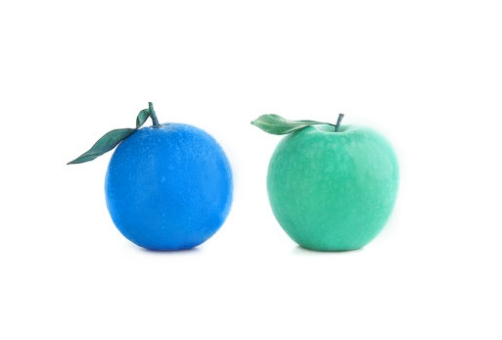

(334, 500, 3)

In [2]:
img = cv.imread('frutas.jpg')
mostrar(cv.cvtColor(img, cv.COLOR_BGR2RGB))
img.shape

In [3]:
vetorizado = img.reshape((-1, 3))
vetorizado.shape

(167000, 3)

In [4]:
vetorizado = np.float32(vetorizado)

In [5]:
criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [6]:
ret, label, centros = cv.kmeans(vetorizado, 3, None, criterio, 10, cv.KMEANS_RANDOM_CENTERS)

In [7]:
centros = np.uint8(centros)

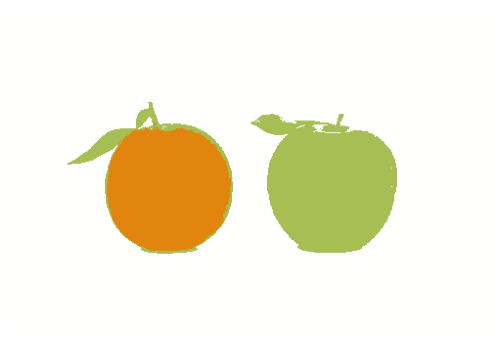

In [12]:
img_final = centros[label.flatten()]
img_final = img_final.reshape(img.shape)
mostrar(img_final)

In [9]:
def segmentacao_cluster(img, k=2):
    vetorizado = np.float32(img).reshape(-1,3)
    criterio = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    ret, label, centros = cv.kmeans(vetorizado, k, None, criterio, 10, cv.KMEANS_RANDOM_CENTERS)
    centros = np.uint8(centros)
    img_final = centros[label.flatten()]
    img_final = img_final.reshape(img.shape)
    return img_final

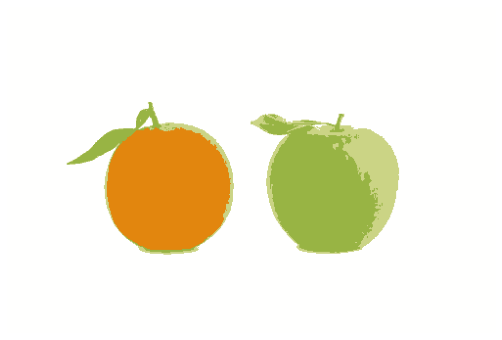

In [10]:
seg_cluster = segmentacao_cluster(img, 4)
mostrar(seg_cluster)


In [19]:
def segmentacao_clustering(img):
    titulos = ["Imagem Original"]
    imagens = [img]

    segmentacoes = 6
    for k in range(2, segmentacoes+1):
        titulo = 'k = ' + str(k)
        titulos.append(titulo)
        seg = segmentacao_cluster(img, k)
        imagens.append(seg)
    
    fig = plt.gcf()
    fig.set_size_inches(18, 12)
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(cv.cvtColor(imagens[i], cv.COLOR_BGR2RGB))
        plt.title(titulos[i])
        plt.xticks([]), plt.yticks([])
    
    plt.subplots_adjust(wspace=0.05)
    plt.show()

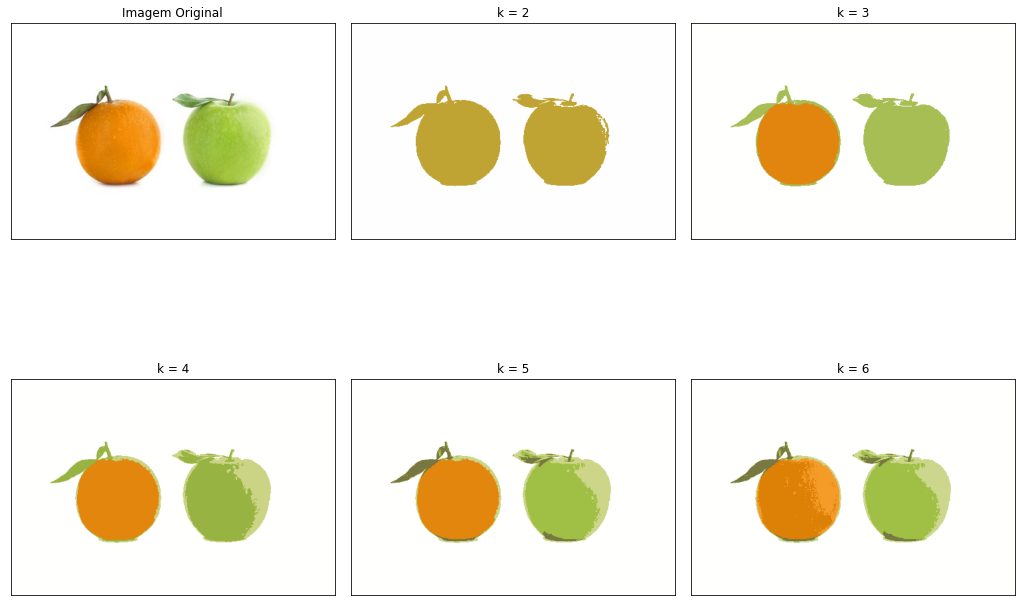

In [21]:
segmentacao_clustering(img)

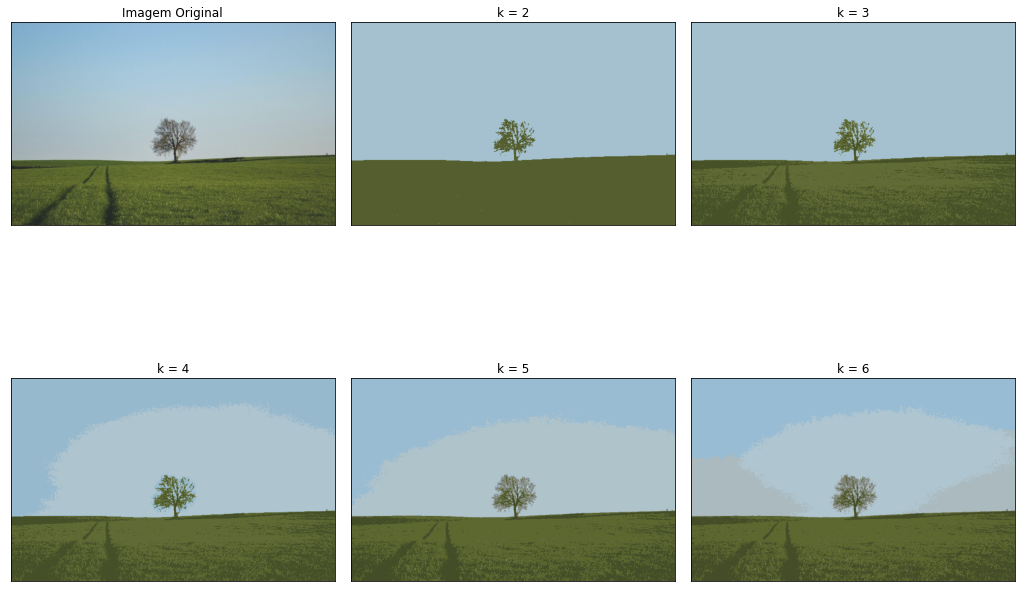

In [22]:
img = cv.imread('paisagem01.jpg')
segmentacao_clustering(img)

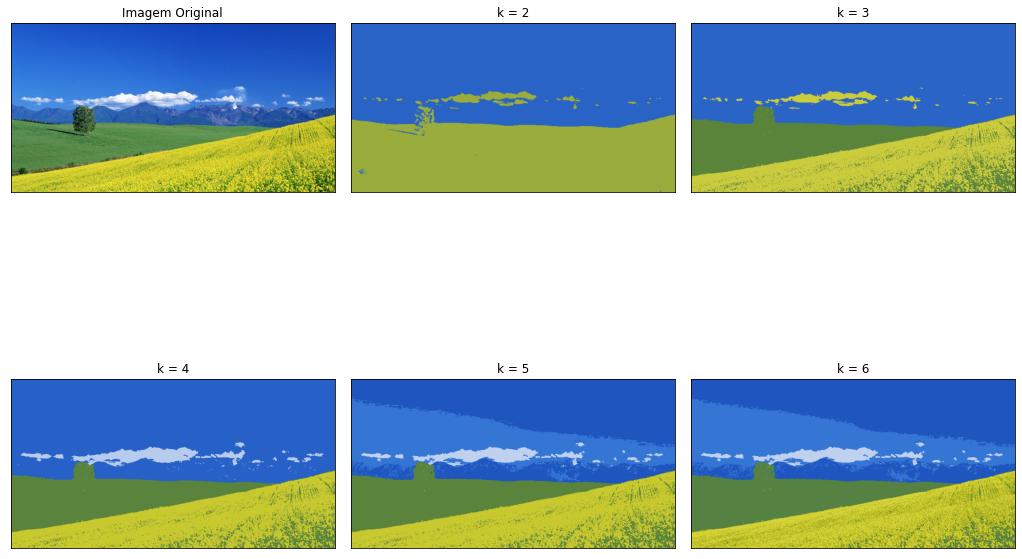

In [23]:
img = cv.imread('paisagem02.jpg')
segmentacao_clustering(img)

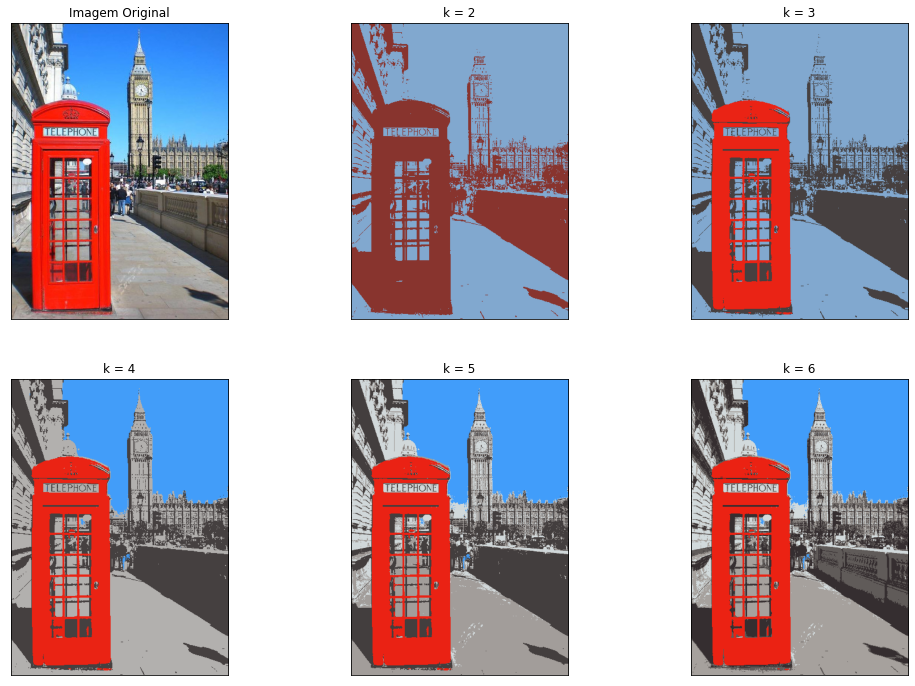

In [24]:
img = cv.imread('london-red-phonebox.jpg')
segmentacao_clustering(img)

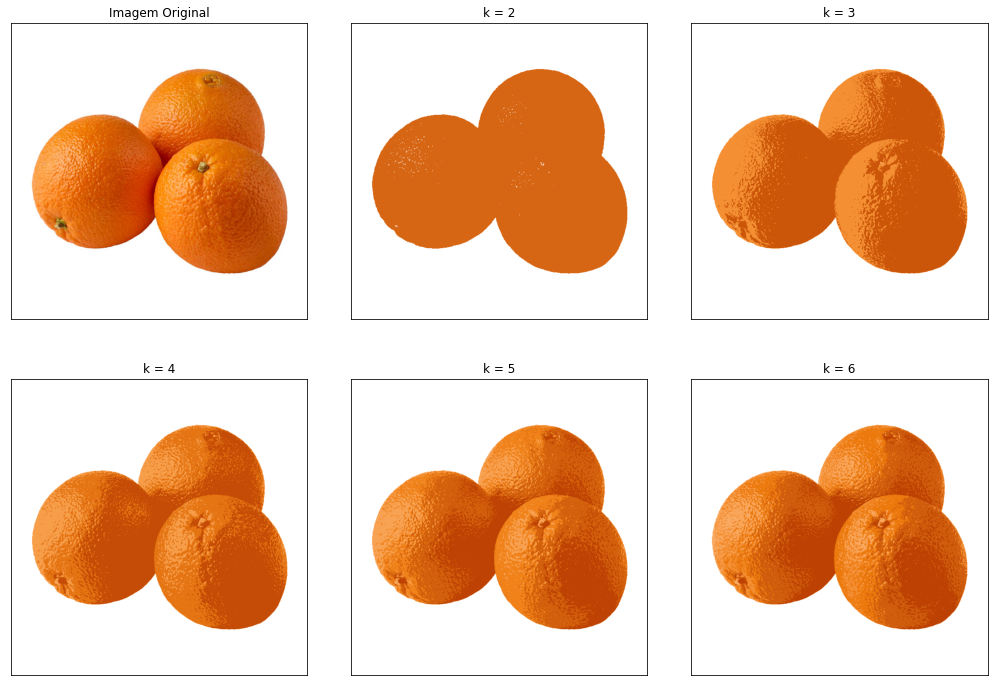

In [25]:
img = cv.imread('laranjas.jpg')
segmentacao_clustering(img)